In [2]:
pip install folium

In [13]:
import pandas as pd
import numpy as np
import random

# Define date range
start_date = pd.to_datetime('1979-01-01')  # Start before the first recession
end_date = pd.to_datetime('2023-12-31')  # Include some post-recession data

# Create a date range
date_range = pd.date_range(start_date, end_date, freq='MS')  # Monthly frequency

# Define recession periods
recession_periods = [
    (pd.to_datetime('1980-01-01'), pd.to_datetime('1980-12-31')),
    (pd.to_datetime('1981-01-01'), pd.to_datetime('1982-12-31')),
    (pd.to_datetime('1991-01-01'), pd.to_datetime('1991-12-31')),
    (pd.to_datetime('2000-01-01'), pd.to_datetime('2001-12-31')),
    (pd.to_datetime('2007-10-01'), pd.to_datetime('2009-06-30')),
    (pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-30'))
]

# Create DataFrame
df = pd.DataFrame({
    'Date': date_range
})

# Add Recession column
df['Recession'] = df['Date'].apply(lambda date: 1 if any(start <= date <= end for start, end in recession_periods) else 0)

# Generate other columns with some randomness and trends
df['Automobile_Sales'] = np.clip(10000 + 500 * df['Date'].dt.year + np.random.normal(0, 2000, size=len(df)) - 3000 * df['Recession'], 0, None)
df['GDP'] = 10000 + 200 * df['Date'].dt.year - 800 * df['Recession'] + np.random.normal(0, 500, size=len(df))
df['Unemployment_Rate'] = 5 + 0.1 * df['Recession'] + np.random.normal(0, 1, size=len(df))
df['Consumer_Confidence'] = 100 - 10 * df['Recession'] - 0.5 * df['Unemployment_Rate'] + np.random.normal(0, 5, size=len(df))
df['Seasonality_Weight'] = df['Date'].dt.month.apply(lambda month: 1 + 0.2 * np.sin(2 * np.pi * (month - 1) / 12))
df['Price'] = 20000 + 1000 * df['Date'].dt.year + np.random.normal(0, 2000, size=len(df))
df['Advertising_Expenditure'] = 500000 + 50000 * df['Date'].dt.year - 200000 * df['Recession'] + np.random.normal(0, 100000, size=len(df))

# Define vehicle types
vehicle_types = ['Supperminicar', 'Smallfamiliycar', 'Mediumfamilycar', 'Executivecar', 'Sports']

# Add Vehicle_Type column
df['Vehicle_Type'] = np.random.choice(vehicle_types, size=len(df))

# Add Competition column (simulated as a random value between 1 and 5)
df['Competition'] = np.random.randint(1, 6, size=len(df))

# Add Month and Year columns
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Save to CSV
df.to_csv('historical_automobile_sales.csv', index=False)

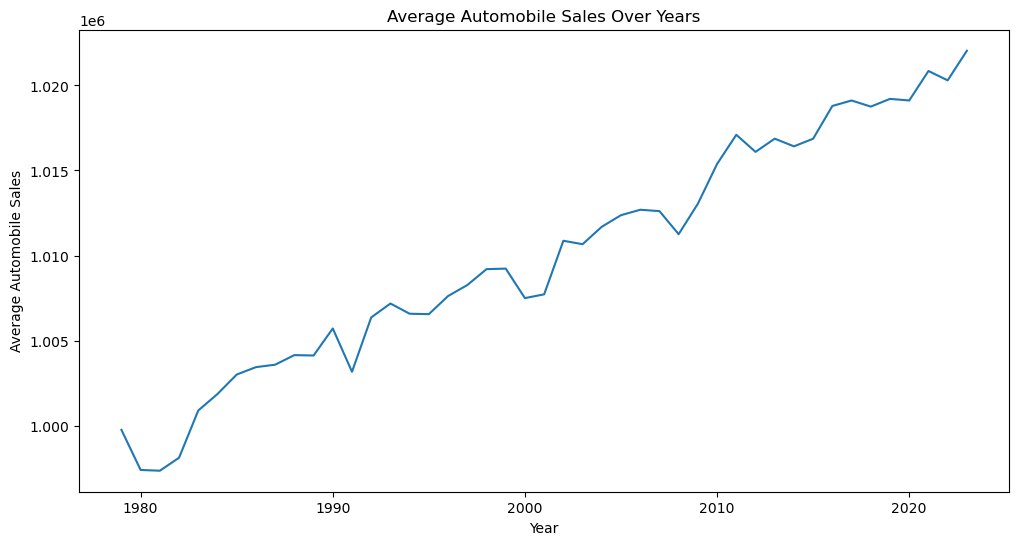

C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_9580\14293452.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', data=df, ci=None)


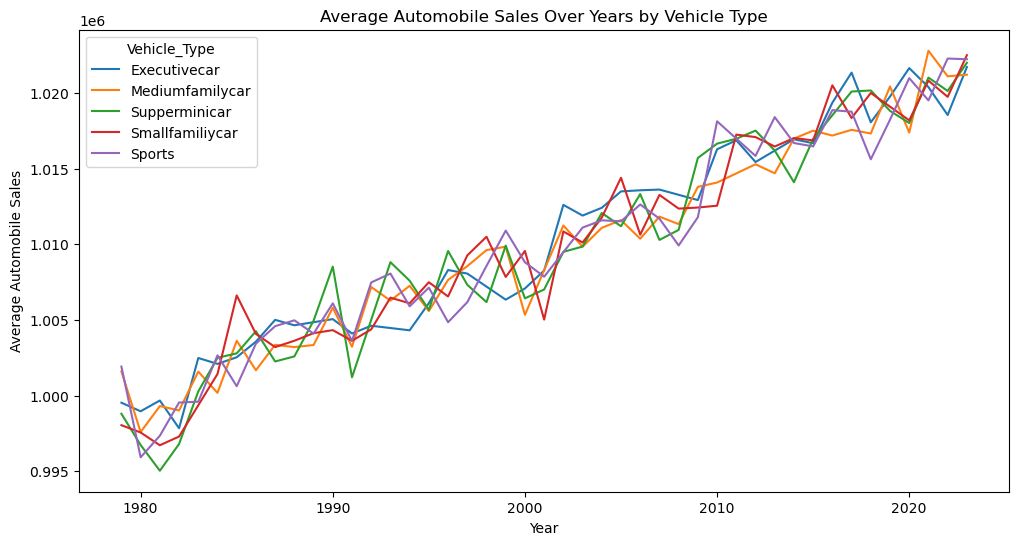

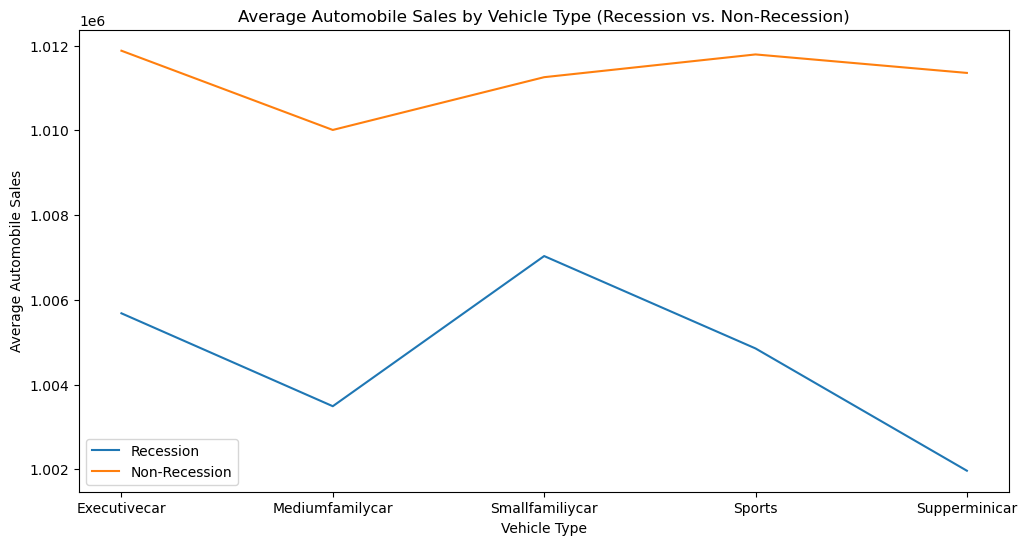

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the dataset
df = pd.read_csv('historical_automobile_sales.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Part 1: Visualizations

# TASK 1.1: Line chart of automobile sales over time
plt.figure(figsize=(12, 6))
df.groupby(df['Date'].dt.year)['Automobile_Sales'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Over Years')
plt.show()

# TASK 1.2: Line chart of sales trends for different vehicle types
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', data=df, ci=None)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Over Years by Vehicle Type')
plt.show()

# TASK 1.3: Sales trend per vehicle type during recession vs. non-recession
recession_df = df[df['Recession'] == 1].groupby('Vehicle_Type')['Automobile_Sales'].mean()
non_recession_df = df[df['Recession'] == 0].groupby('Vehicle_Type')['Automobile_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.plot(recession_df.index, recession_df.values, label='Recession')
plt.plot(non_recession_df.index, non_recession_df.values, label='Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Vehicle Type (Recession vs. Non-Recession)')
plt.legend()
plt.show()

# ... (Rest of the tasks)

# Part 2: Dash Dashboard

# TASK 2.1: Create a Dash app
app = dash.Dash(__name__)
app.title = 'Automobile Sales Dashboard'

# TASK 2.2: Add dropdowns
app.layout = html.Div([
    html.H1('Automobile Sales Dashboard'),

    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in df['Year'].unique()],
        value=df['Year'].min()
    ),

    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[{'label': vehicle_type, 'value': vehicle_type} for vehicle_type in df['Vehicle_Type'].unique()],
        value=df['Vehicle_Type'].unique()[0]
    ),

    # TASK 2.3: Output division
    html.Div(id='output-container', className='output-container'),
])

# TASK 2.4: Callbacks
@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),
     Input('vehicle-type-dropdown', 'value')]
)
def update_output(selected_year, selected_vehicle_type):
    # ... (Filtering and plotting logic based on dropdown selections)
    pass  # Add this line (indented)

if __name__ == '__main__':
    app.run_server(debug=True)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path)
df = pd.read_csv('historical_automobile_sales.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot GDP during recession periods
recession_df = df[df['Recession'] == 1]
axes[0].plot(recession_df['Date'], recession_df['GDP'], label='Recession')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].set_title('GDP During Recession Periods')
axes[0].legend()
axes[0].grid(True)

# Plot GDP during non-recession periods
non_recession_df = df[df['Recession'] == 0]
axes[1].plot(non_recession_df['Date'], non_recession_df['GDP'], label='Non-Recession')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')
axes[1].set_title('GDP During Non-Recession Periods')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt

# Assuming you have the data loaded in 'df' and 'Date' is converted to datetime

plt.figure(figsize=(12, 8))
plt.scatter(df['Date'], df['Automobile_Sales'], s=df['Seasonality_Weight'] * 100, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Automobile Sales')
plt.title('Impact of Seasonality on Automobile Sales (Bubble Plot)')
plt.show()

In [7]:
import matplotlib.pyplot as plt

# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Correlation between Average Vehicle Price and Sales during Recessions')
plt.show()

In [8]:
import matplotlib.pyplot as plt

# Calculate total advertising expenditure for each period
recession_expenditure = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
non_recession_expenditure = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie([recession_expenditure, non_recession_expenditure], labels=['Recession', 'Non-Recession'], autopct='%1.1f%%')
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

In [9]:
import matplotlib.pyplot as plt

# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Calculate total advertising expenditure per vehicle type
expenditure_by_type = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(expenditure_by_type, labels=expenditure_by_type.index, autopct='%1.1f%%')
plt.title('Advertising Expenditure by Vehicle Type during Recessions')
plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Unemployment_Rate', y='Automobile_Sales', hue='Vehicle_Type', data=recession_df, ci=None)
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recessions')
plt.show()

C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_9580\3265760084.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




In [3]:
# Create Dash application
app = dash.Dash(__name__)

# Set a meaningful title
app.title = "Automobile Sales Dashboard"

In [4]:
app.layout = html.Div([
    # ... (dropdowns from TASK 2.2)
    html.Div(id='output-container', className='output-container')
])

In [5]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_csv('historical_automobile_sales.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Create Dash application
app = dash.Dash(__name__)

# Set a meaningful title
app.title = "Automobile Sales Dashboard"

In [7]:
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),

    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            value=df['Year'].min()
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-type-dropdown',
            options=[{'label': vehicle_type, 'value': vehicle_type} for vehicle_type in df['Vehicle_Type'].unique()],
            value=df['Vehicle_Type'].unique()[0]
        )
    ], style={'width': '48%', 'display': 'inline-block'}),
    # ... (rest of the layout)
])

In [8]:
app.layout = html.Div([
    # ... (dropdowns from TASK 2.2)
    html.Div(id='output-container', className='output-container')
])

In [9]:
@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),
     Input('vehicle-type-dropdown', 'value')]
)
def update_output(selected_year, selected_vehicle_type):
    filtered_df = df[(df['Year'] == selected_year) & (df['Vehicle_Type'] == selected_vehicle_type)]

    if not filtered_df.empty:
        fig = px.line(filtered_df, x='Date', y='Automobile_Sales',
                      title=f'Sales for {selected_vehicle_type} in {selected_year}')
        return dcc.Graph(figure=fig)
    else:
        return html.Div("No data available for the selected year and vehicle type.")

In [10]:
@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),
     Input('vehicle-type-dropdown', 'value')]
)
def update_output(selected_year, selected_vehicle_type):
    filtered_df = df[(df['Year'] == selected_year) & (df['Vehicle_Type'] == selected_vehicle_type)]

    if not filtered_df.empty:
        # Recession Report Statistics (example: sales during recession vs. non-recession)
        recession_sales = filtered_df[filtered_df['Recession'] == 1]['Automobile_Sales'].sum()
        non_recession_sales = filtered_df[filtered_df['Recession'] == 0]['Automobile_Sales'].sum()

        fig = px.bar(x=['Recession', 'Non-Recession'], y=[recession_sales, non_recession_sales],
                      title=f'Recession Impact on Sales ({selected_year}, {selected_vehicle_type})')

        return dcc.Graph(figure=fig)
    else:
        return html.Div("No data available for the selected year and vehicle type.")

In [11]:
@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),
     Input('vehicle-type-dropdown', 'value')]
)
def update_output(selected_year, selected_vehicle_type):
    filtered_df = df[(df['Year'] == selected_year) & (df['Vehicle_Type'] == selected_vehicle_type)]

    if not filtered_df.empty:
        # Yearly Report Statistics (example: monthly sales trend)
        fig = px.line(filtered_df, x='Month', y='Automobile_Sales',
                      title=f'Monthly Sales Trend ({selected_year}, {selected_vehicle_type})')

        return dcc.Graph(figure=fig)
    else:
        return html.Div("No data available for the selected year and vehicle type.")

In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_csv('historical_automobile_sales.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create Dash application (DEFINE 'app' FIRST)
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

# ... (Your layout code here)

# Define the callback function (NOW 'app' IS DEFINED)
@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),
     Input('vehicle-type-dropdown', 'value')]
)
def update_output(selected_year, selected_vehicle_type):
    filtered_df = df[(df['Year'] == selected_year) & (df['Vehicle_Type'] == selected_vehicle_type)]

    if not filtered_df.empty:
        # ... (Your plotting logic)
        yearly_fig = px.line(filtered_df, x='Month', y='Automobile_Sales',
                      title=f'Monthly Sales Trend ({selected_year},{selected_vehicle_type})')
        return dcc.Graph(figure=yearly_fig)
    else:
        return html.Div("No data available for the selected year and vehicle type.")

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
NoLayoutException                         Traceback (most recent call last)
NoLayoutException: The layout was `None` at the time that `run_server` was called.
Make sure to set the `layout` attribute of your application
before running the server.



In [12]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

df = pd.read_csv('historical_automobile_sales.csv')
df['Date'] = pd.to_datetime(df['Date'])

app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),

    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',  # Correct ID
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            value=df['Year'].min()
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-type-dropdown',  # Correct ID
            options=[{'label': vehicle_type, 'value': vehicle_type} for vehicle_type in df['Vehicle_Type'].unique()],
            value=df['Vehicle_Type'].unique()[0]
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div(id='output-container', className='output-container')
])

@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),  # Correct ID
     Input('vehicle-type-dropdown', 'value')]  # Correct ID
)
def update_output(selected_year, selected_vehicle_type):
    filtered_df = df[(df['Year'] == selected_year) & (df['Vehicle_Type'] == selected_vehicle_type)]

    if not filtered_df.empty:
        recession_sales = filtered_df[filtered_df['Recession'] == 1]['Automobile_Sales'].sum()
        non_recession_sales = filtered_df[filtered_df['Recession'] == 0]['Automobile_Sales'].sum()

        recession_fig = px.bar(x=['Recession', 'Non-Recession'], y=[recession_sales, non_recession_sales],
                      title=f'Recession Impact ({selected_year},{selected_vehicle_type})')

        yearly_fig = px.line(filtered_df, x='Month', y='Automobile_Sales',
                      title=f'Monthly Sales Trend ({selected_year},{selected_vehicle_type})')

        return html.Div([dcc.Graph(figure=recession_fig),dcc.Graph(figure=yearly_fig)])

    else:
        return html.Div("No data available for the selected year and vehicle type.")

if __name__ == '__main__':
    app.run_server(debug=True)

In [15]:
app.layout = html.Div([
    # ... (dropdowns from TASK 2.2)
    html.Div(id='output-container', className='output-container')
])

In [16]:
@app.callback(
    Output('output-container', 'children'),
    [Input('year-dropdown', 'value'),
     Input('vehicle-type-dropdown', 'value')]
)
def update_output(selected_year, selected_vehicle_type):
    filtered_df = df[(df['Year'] == selected_year) & (df['Vehicle_Type'] == selected_vehicle_type)]

    if not filtered_df.empty:
        fig = px.line(filtered_df, x='Date', y='Automobile_Sales',
                      title=f'Sales for {selected_vehicle_type} in {selected_year}')
        return dcc.Graph(figure=fig)
    else:
        return html.Div("No data available for the selected year and vehicle type.")